<a href="https://colab.research.google.com/github/santia12345/GRUPO-25-ML/blob/main/Proyecto_ML_Grupo_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yaml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultado

In [ ]:
df_banco = pd.read_csv("german_credit.csv")

df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
def meses(num):
    if num>=1 and num<12:
      num=1
      return num
    if num>=12 and num<24:
      num=2
      return num
    if num>=24 and num<36:
      num=3
      return num
    if num>=36 and num<48:
      num=4
      return num
    if num>=48 and num<60:
      num=5
      return num
    if num>=60 and num<72:
      num=6
      return num

In [ ]:
def monto(valor):
    if valor>=1 and valor<1000:
      valor=1
      return valor
    if valor>=1000 and valor<2000:
      valor=2
      return valor
    if valor>=2000 and valor<3000:
      valor=3
      return valor
    if valor>=3000 and valor<4000:
      valor=4
      return valor
    if valor>=4000 and valor<5000:
      valor=5
      return valor
    if valor>=5000 and valor<6000:
      valor=6
      return valor
    if valor>=6000 and valor<7000:
      valor=7
      return valor
    if valor>=7000 and valor<8000:
      valor=8
      return valor
    if valor>=8000 and valor<9000:
      valor=9
      return valor
    if valor>=9000 and valor<10000:
      valor=10
      return valor
    if valor>=10000 and valor<11000:
      valor=11
      return valor
    if valor>=11000 and valor<12000:
      valor=12
      return valor
    if valor>=12000 and valor<13000:
      valor=13
      return valor
    if valor>=13000 and valor<14000:
      valor=14
      return valor
    if valor>=14000 and valor<15000:
      valor=15
      return valor
    if valor>=15000 and valor<16000:
      valor=16
      return valor
    if valor>=16000 and valor<17000:
      valor=17
      return valor
    if valor>=17000 and valor<18000:
      valor=18
      return valor
    if valor>=18000 and valor<19000:
      valor=19
      return valor
    if valor>=19000 and valor<20000:
      valor=20
      return valor

In [ ]:
def ages(edad):
    if edad>=18 and edad<30:
      edad=1
      return edad
    if edad>=30 and edad<40:
      edad=2
      return edad
    if edad>=40 and edad<50:
      edad=3
      return edad
    if edad>=50 and edad<60:
      edad=4
      return edad
    if edad>=60 and edad<70:
      edad=5
      return edad
    if edad>=70 and edad<80:
      edad=6
      return edad

In [ ]:
def procesar_datos():

  global df_banco, resultados

  df_banco.duplicated()
  df_banco.drop_duplicates()



  df_banco['account_check_status'].unique()
  a2= {'< 0 DM' : 1,
      '0 <= ... < 200 DM' : 2,
      '>= 200 DM' : 3,
      'no checking account' : 4
    }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a2)
  df_banco.account_check_status=df_banco.account_check_status.fillna(0)
  df_banco.account_check_status=df_banco.account_check_status.astype(int)

  df_banco['duration_in_month'].unique()
  df_banco['duration_in_month'] = df_banco['duration_in_month'].map(meses)
  df_banco.duration_in_month=df_banco.duration_in_month.fillna(0)
  df_banco.duration_in_month=df_banco.duration_in_month.astype(int)

  df_banco['credit_history'].unique()
  a4= {'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
    }
  df_banco['credit_history'] = df_banco['credit_history'].map(a4)
  df_banco.credit_history=df_banco.credit_history.fillna(0)
  df_banco.credit_history=df_banco.credit_history.astype(int)

  df_banco['purpose'].unique()
  a5= {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
    }
  df_banco['purpose'] = df_banco['purpose'].map(a5)
  df_banco.purpose=df_banco.purpose.fillna(0)
  df_banco.purpose=df_banco.purpose.astype(int)

  df_banco['credit_amount'].unique()
  df_banco['credit_amount'] = df_banco['credit_amount'].map(monto)
  df_banco.credit_amount=df_banco.credit_amount.fillna(0)
  df_banco.credit_amount=df_banco.credit_amount.astype(int)

  df_banco['savings'].unique()
  a7= {'... < 100 DM' : 5,
      '100 <= ... < 500 DM' : 4,
      '500 <= ... < 1000 DM' : 3,
      '.. >= 1000 DM' : 2,
      'unknown/ no savings account' : 1
    }
  df_banco['savings'] = df_banco['savings'].map(a7)
  df_banco.savings=df_banco.savings.fillna(0)
  df_banco.savings=df_banco.savings.astype(int)

  df_banco['present_emp_since'].unique()
  a8= {'unemployed' : 5,
      '... < 1 year' : 4,
      '1 <= ... < 4 years' : 3,
      '4 <= ... < 7 years' : 2,
      '.. >= 7 years' : 1
    }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a8)
  df_banco.present_emp_since=df_banco.present_emp_since.fillna(0)
  df_banco.present_emp_since=df_banco.present_emp_since.astype(int)

  df_banco['personal_status_sex'].unique()
  a10= {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single': 3,
      'male : married/widowed' : 4,
      'female : single' : 5
    }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a10)
  df_banco.personal_status_sex=df_banco.personal_status_sex.fillna(0)
  df_banco.personal_status_sex=df_banco.personal_status_sex.astype(int)

  df_banco['other_debtors'].unique()
  a11= {'none' : 1,
      'co-applicant' : 2,
      'guarantor': 3
    }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a11)
  df_banco.other_debtors=df_banco.other_debtors.fillna(0)
  df_banco.other_debtors=df_banco.other_debtors.astype(int)

  df_banco['property'].unique()
  a12= {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6': 3,
      'unknown / no property' : 4
    }
  df_banco['property'] = df_banco['property'].map(a12)
  df_banco.property=df_banco.property.fillna(0)
  df_banco.property=df_banco.property.astype(int)

  df_banco['age'].unique()
  df_banco['age'] = df_banco['age'].map(ages)
  df_banco.age=df_banco.age.fillna(0)
  df_banco.age=df_banco.age.astype(int)

  df_banco['other_installment_plans'].unique()
  a14= {'bank' : 1,
      'stores' : 2,
      'none': 3
    }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a14)
  df_banco.other_installment_plans=df_banco.other_installment_plans.fillna(0)
  df_banco.other_installment_plans=df_banco.other_installment_plans.astype(int)

  df_banco['housing'].unique()
  a15= {'rent' : 1,
      'own' : 2,
      'for free': 3
    }
  df_banco['housing'] = df_banco['housing'].map(a15)
  df_banco.housing=df_banco.housing.fillna(0)
  df_banco.housing=df_banco.housing.astype(int)

  df_banco['job'].unique()
  a17= {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official': 3,
      'management/ self-employed/ highly qualified employee/ officer': 4
    }
  df_banco['job'] = df_banco['job'].map(a17)
  df_banco.job=df_banco.job.fillna(0)
  df_banco.job=df_banco.job.astype(int)

  df_banco['telephone'].unique()
  a= {'none' : 0,
      'yes, registered under the customers name' : 1
    }
  df_banco['telephone'] = df_banco['telephone'].map(a)
  df_banco.telephone=df_banco.telephone.fillna(1)
  df_banco.telephone=df_banco.telephone.astype(int)

  df_banco['foreign_worker'].unique()
  a20 = {'yes' : 1,
      'no' : 0
      }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a20)
  df_banco.foreign_worker=df_banco.foreign_worker.fillna(0)
  df_banco.foreign_worker=df_banco.foreign_worker.astype(int)

In [ ]:
procesar_datos()
df_banco.head()



,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,1,5,5,2,1,1,4,3,1,4,1,5,3,2,2,3,1,1,1
1,1,2,5,3,5,6,5,3,2,2,1,2,1,1,3,2,1,3,1,0,1
2,0,4,2,5,8,3,5,2,2,3,1,3,1,3,3,2,1,2,2,0,1
3,0,1,4,3,4,8,5,2,2,3,3,4,2,3,3,3,1,3,2,0,1
4,1,1,3,4,1,5,5,3,3,3,1,4,4,4,3,3,2,3,2,0,1


In [ ]:
def sexo(genero):
    if genero==2 or genero==5:
      genero=1
      return genero
    if genero==1 or genero==3 or genero==4:
      genero=0
      return genero


In [ ]:
def est_civil(estado):
    if estado==3 or estado==5:
      estado=1
      return estado
    else:
      estado=0
    return estado


In [ ]:
def feature_engineering():
    global df_banco, resultados
    df_banco['sexo']=df_banco['personal_status_sex']
    df_banco['sexo'].unique
    df_banco['sexo'] = df_banco['sexo'].map(sexo)

    df_banco['estado_civil']=df_banco['personal_status_sex']
    df_banco['estado_civil'].unique
    df_banco['estado_civil'] = df_banco['estado_civil'].map(est_civil)

    df_banco['rango_edad']=df_banco['age']
    df_banco['rango_edad'].unique

    df_banco['rango_plazos_credito']=df_banco['duration_in_month']
    df_banco['rango_plazos_credito'].unique


    df_banco['rango_valor_credito']=df_banco['credit_amount']
    df_banco['rango_valor_credito'].unique

    df_banco= df_banco.drop(columns = ['personal_status_sex', 'personal_status_sex', 'age','duration_in_month','credit_amount'])

In [ ]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,5,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,2,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,3,5


In [ ]:
def analisis_exploratorio():
    global df_banco, resultados
    ax=df_banco.sexo.value_counts().plot(kind = "bar", title = "Sexo")
    ax.set_xlabel('Hombre                                             Mujer')
    plt.show()

    ax=df_banco.estado_civil.value_counts().plot(kind = "bar", title = "Estado civil")
    ax.set_xlabel('Solteros                                             Otros')
    plt.show()

    ax=df_banco.rango_plazos_credito.value_counts().plot(kind = "bar", title = "Rango de plazas de credito")
    plt.show()

    ax=df_banco.rango_edad.value_counts().plot(kind = "bar", title = "Rango de edad")
    plt.show()

    ax=df_banco.default.value_counts().plot(kind = "bar", title = "Default")
    plt.show()

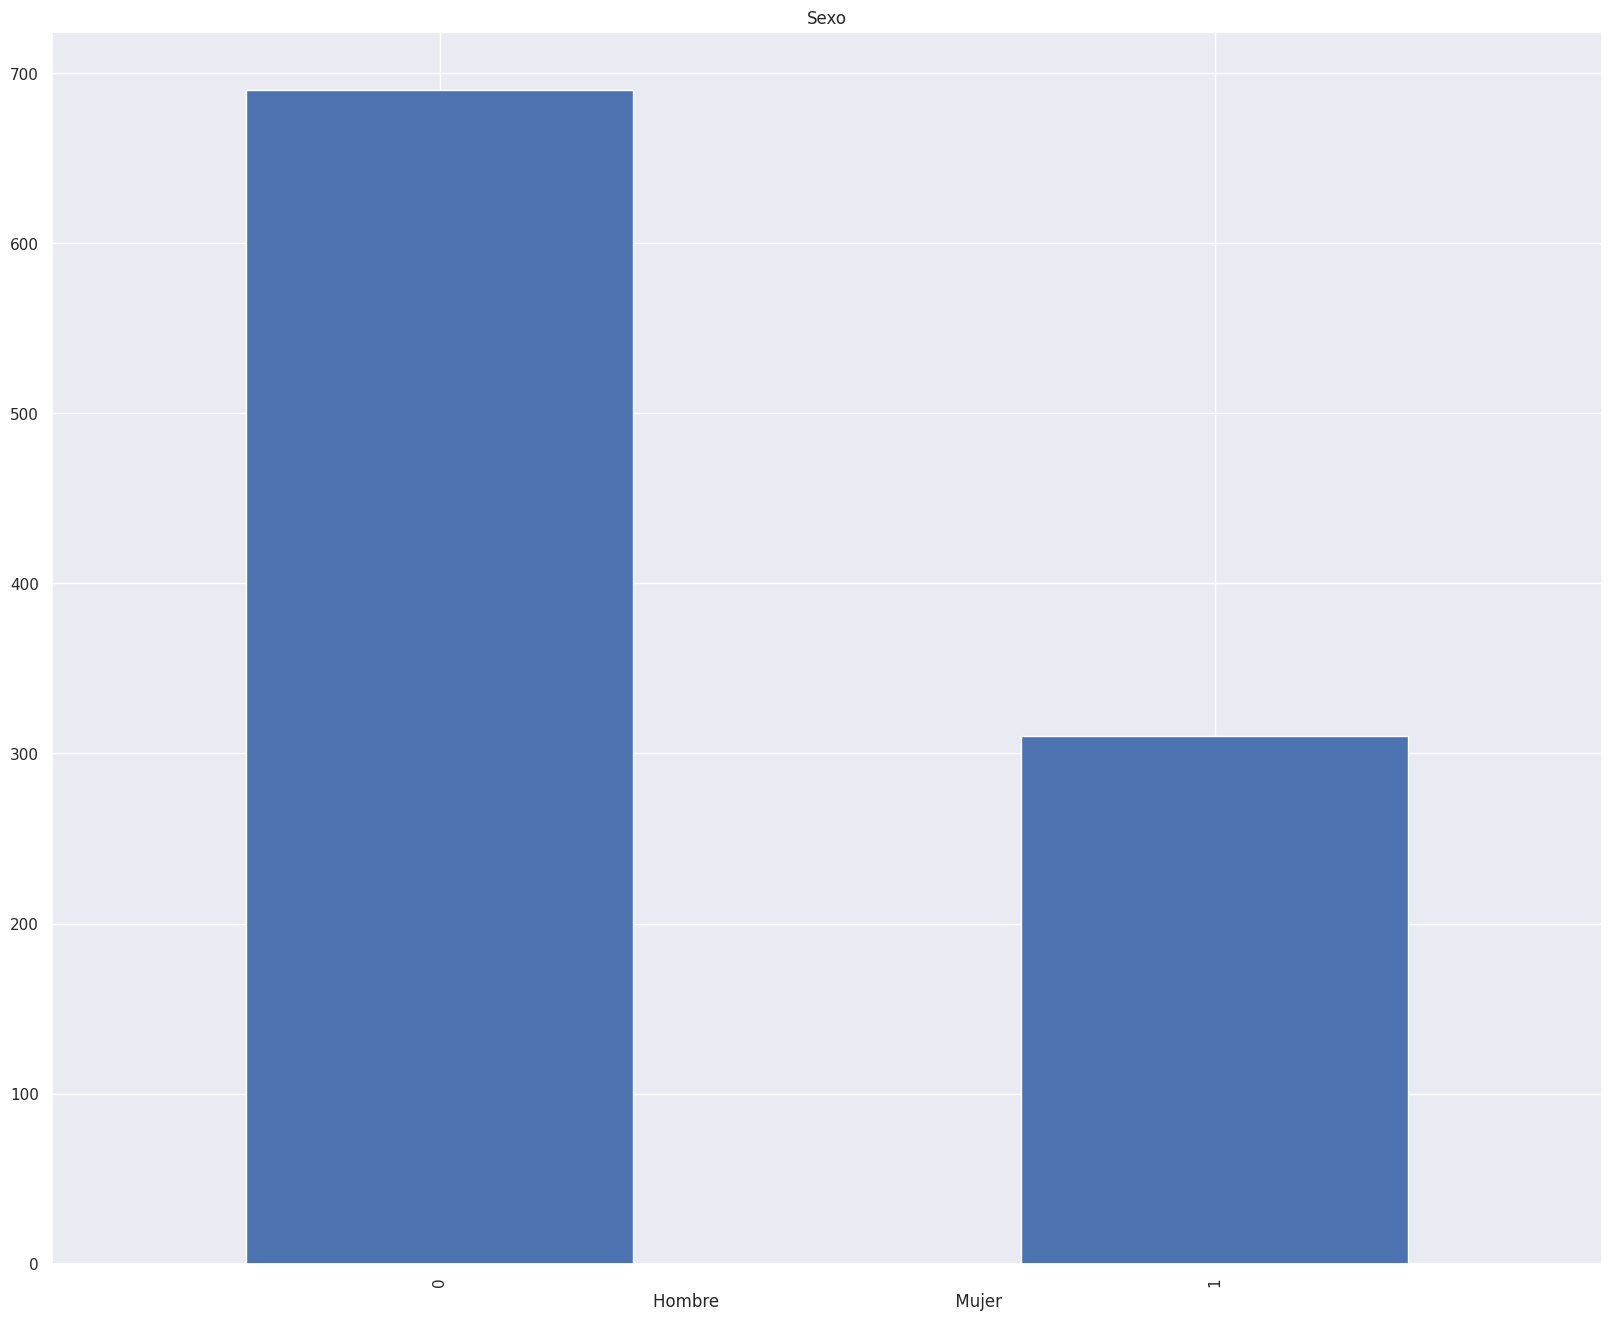

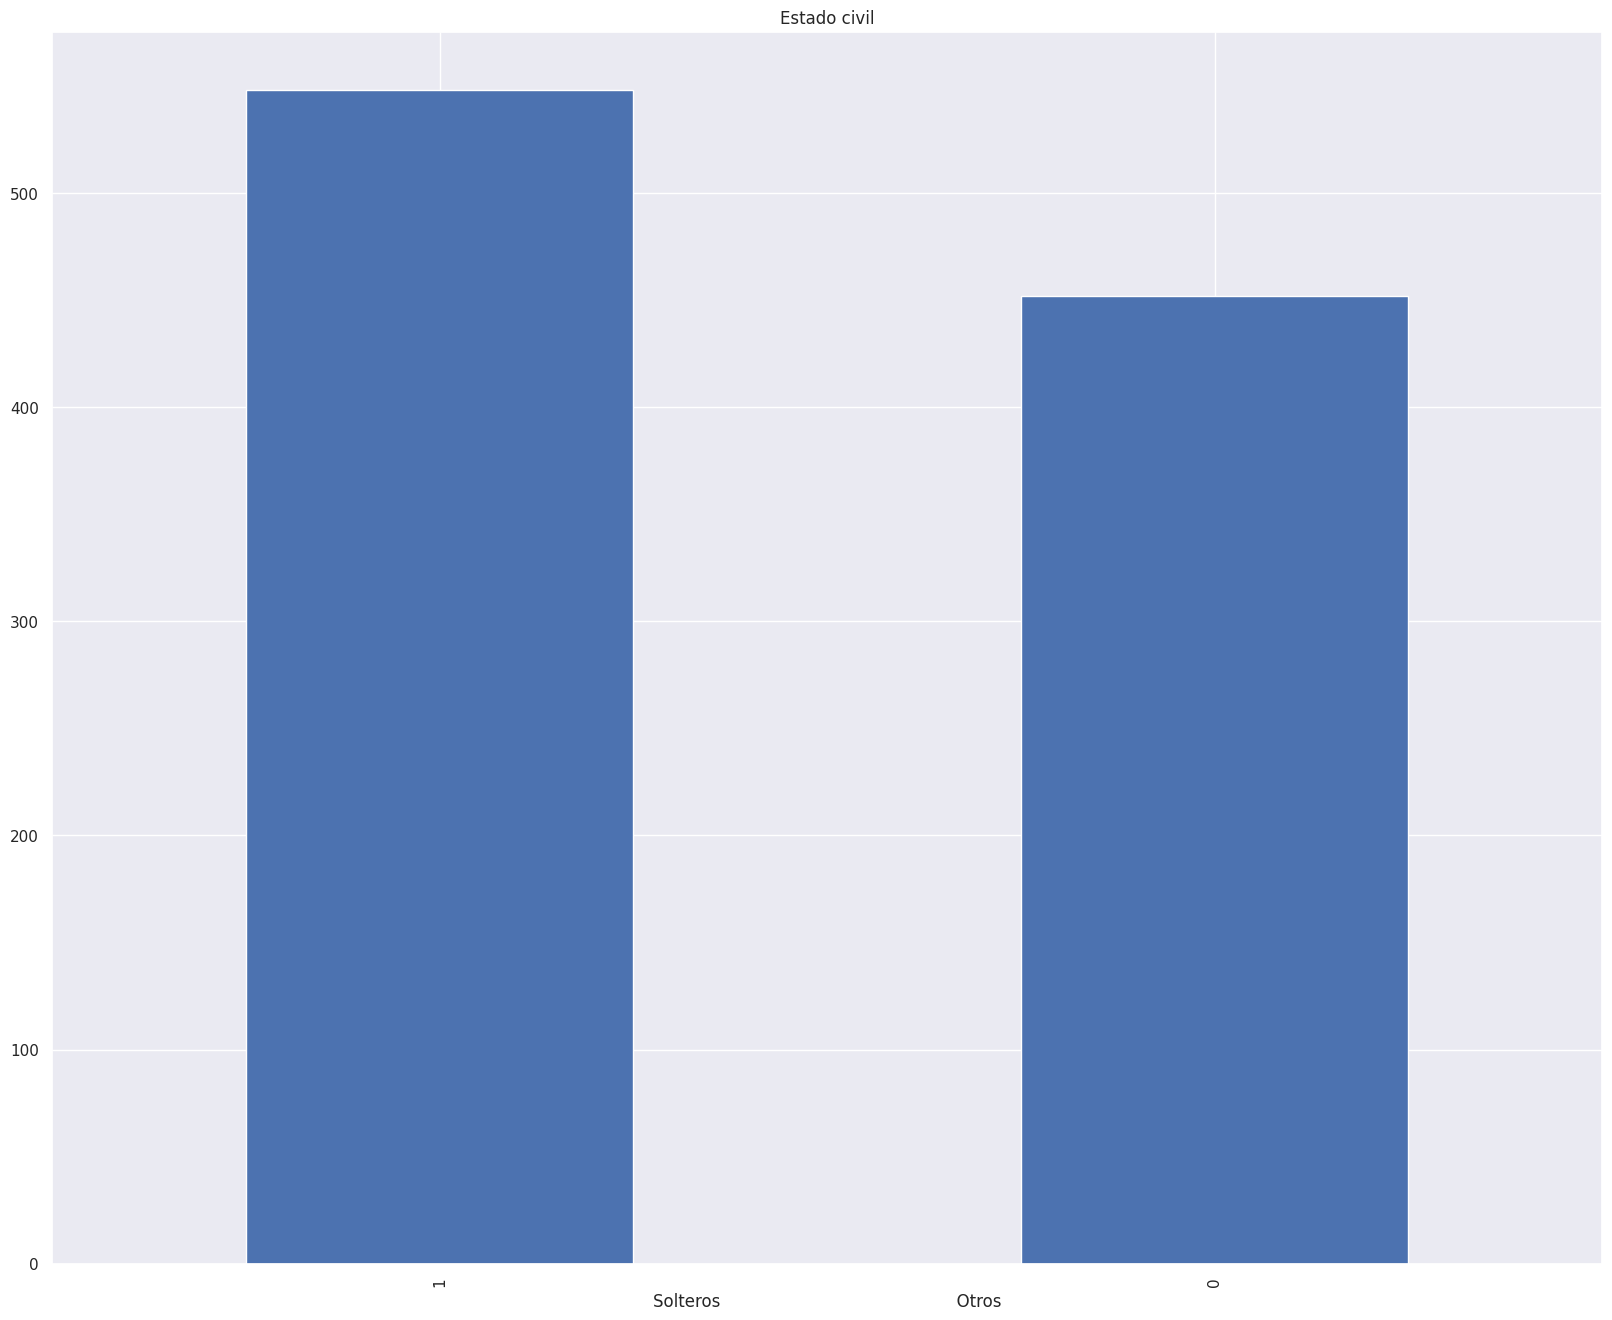

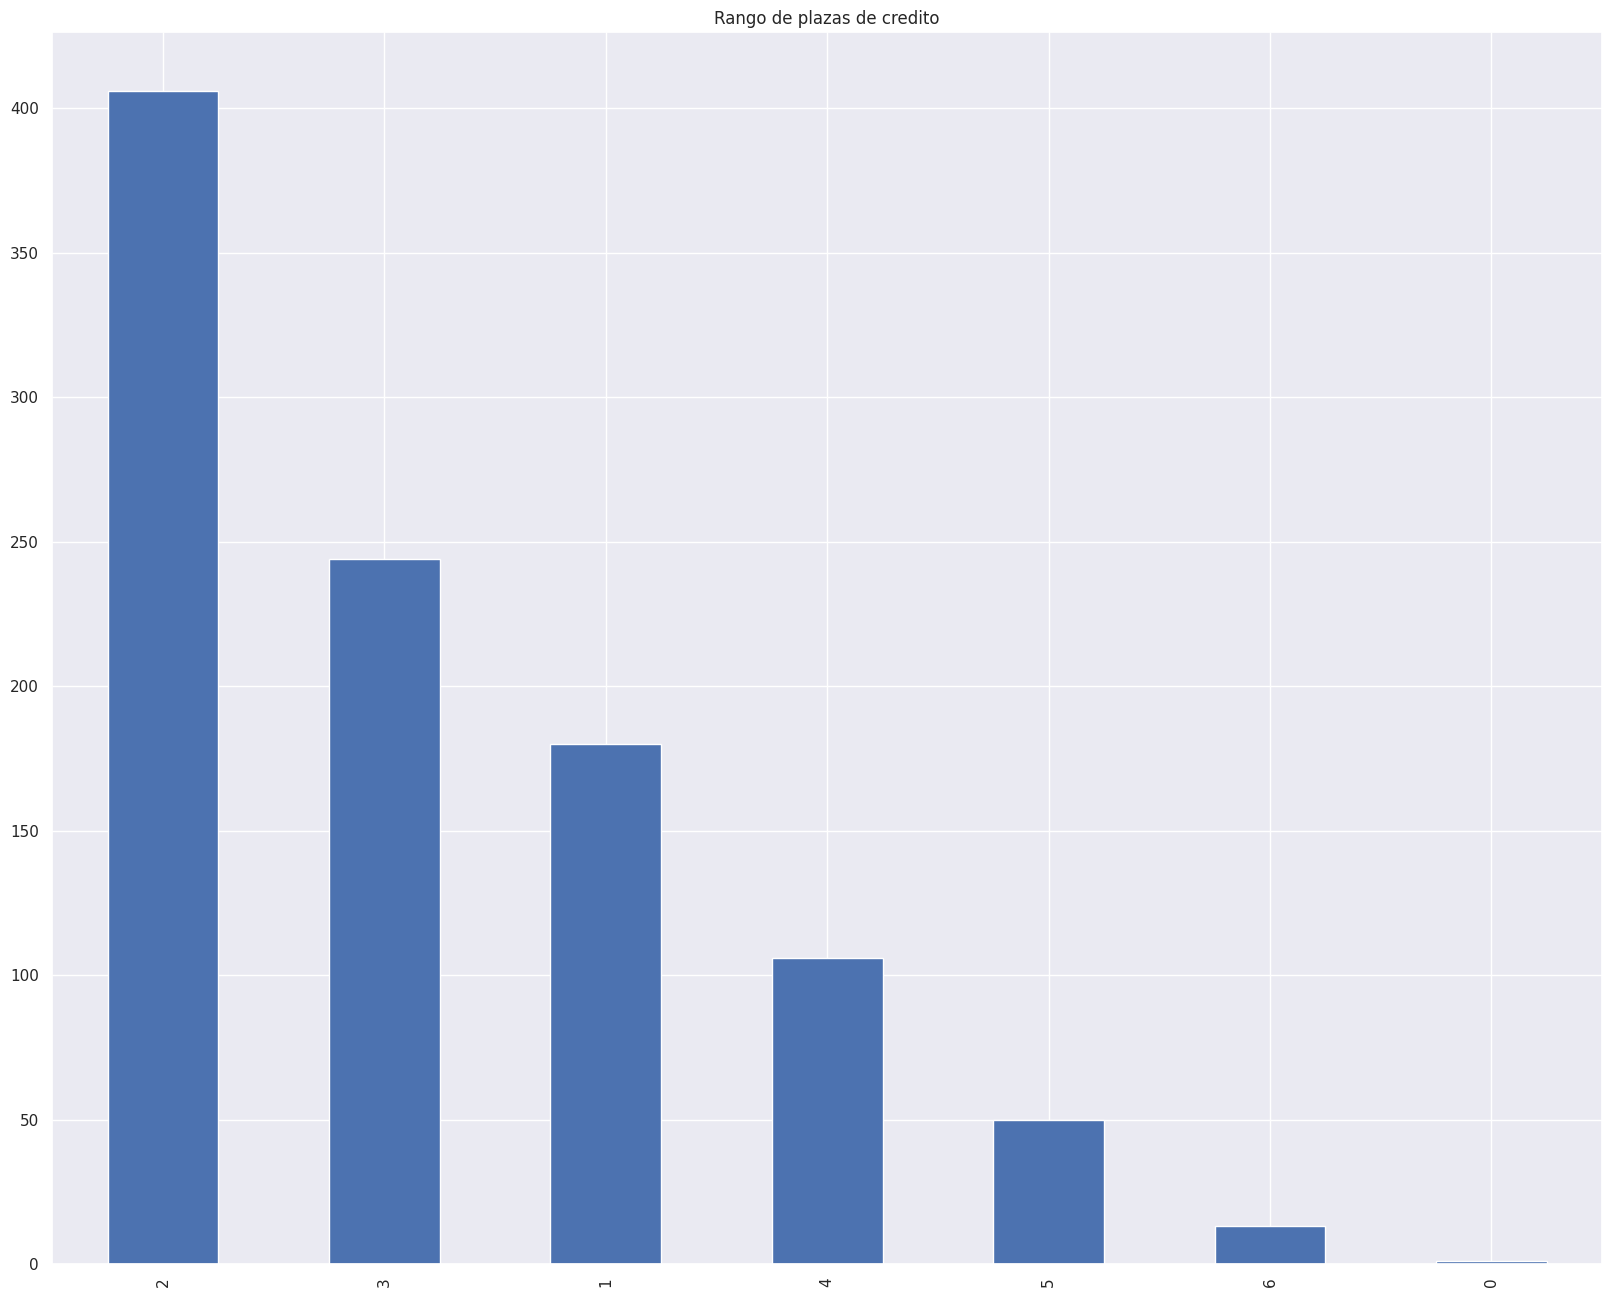

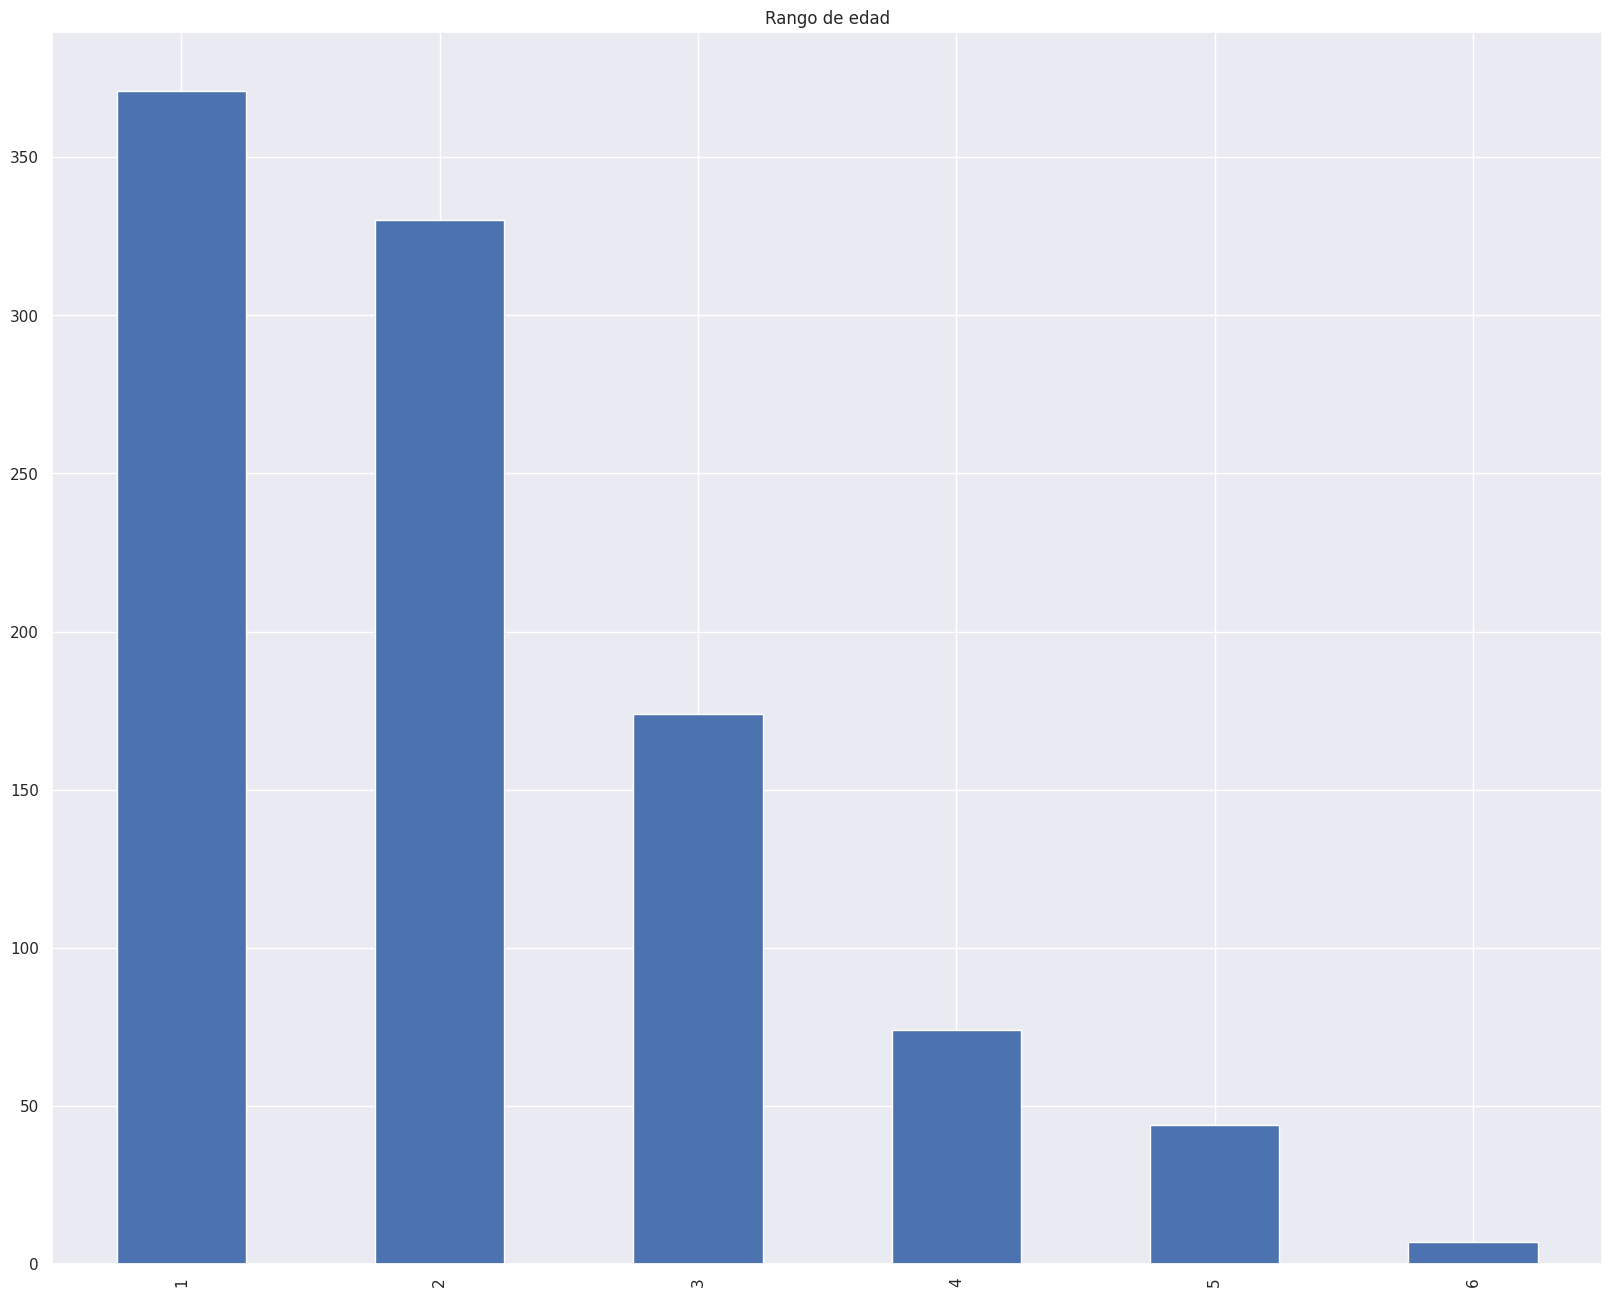

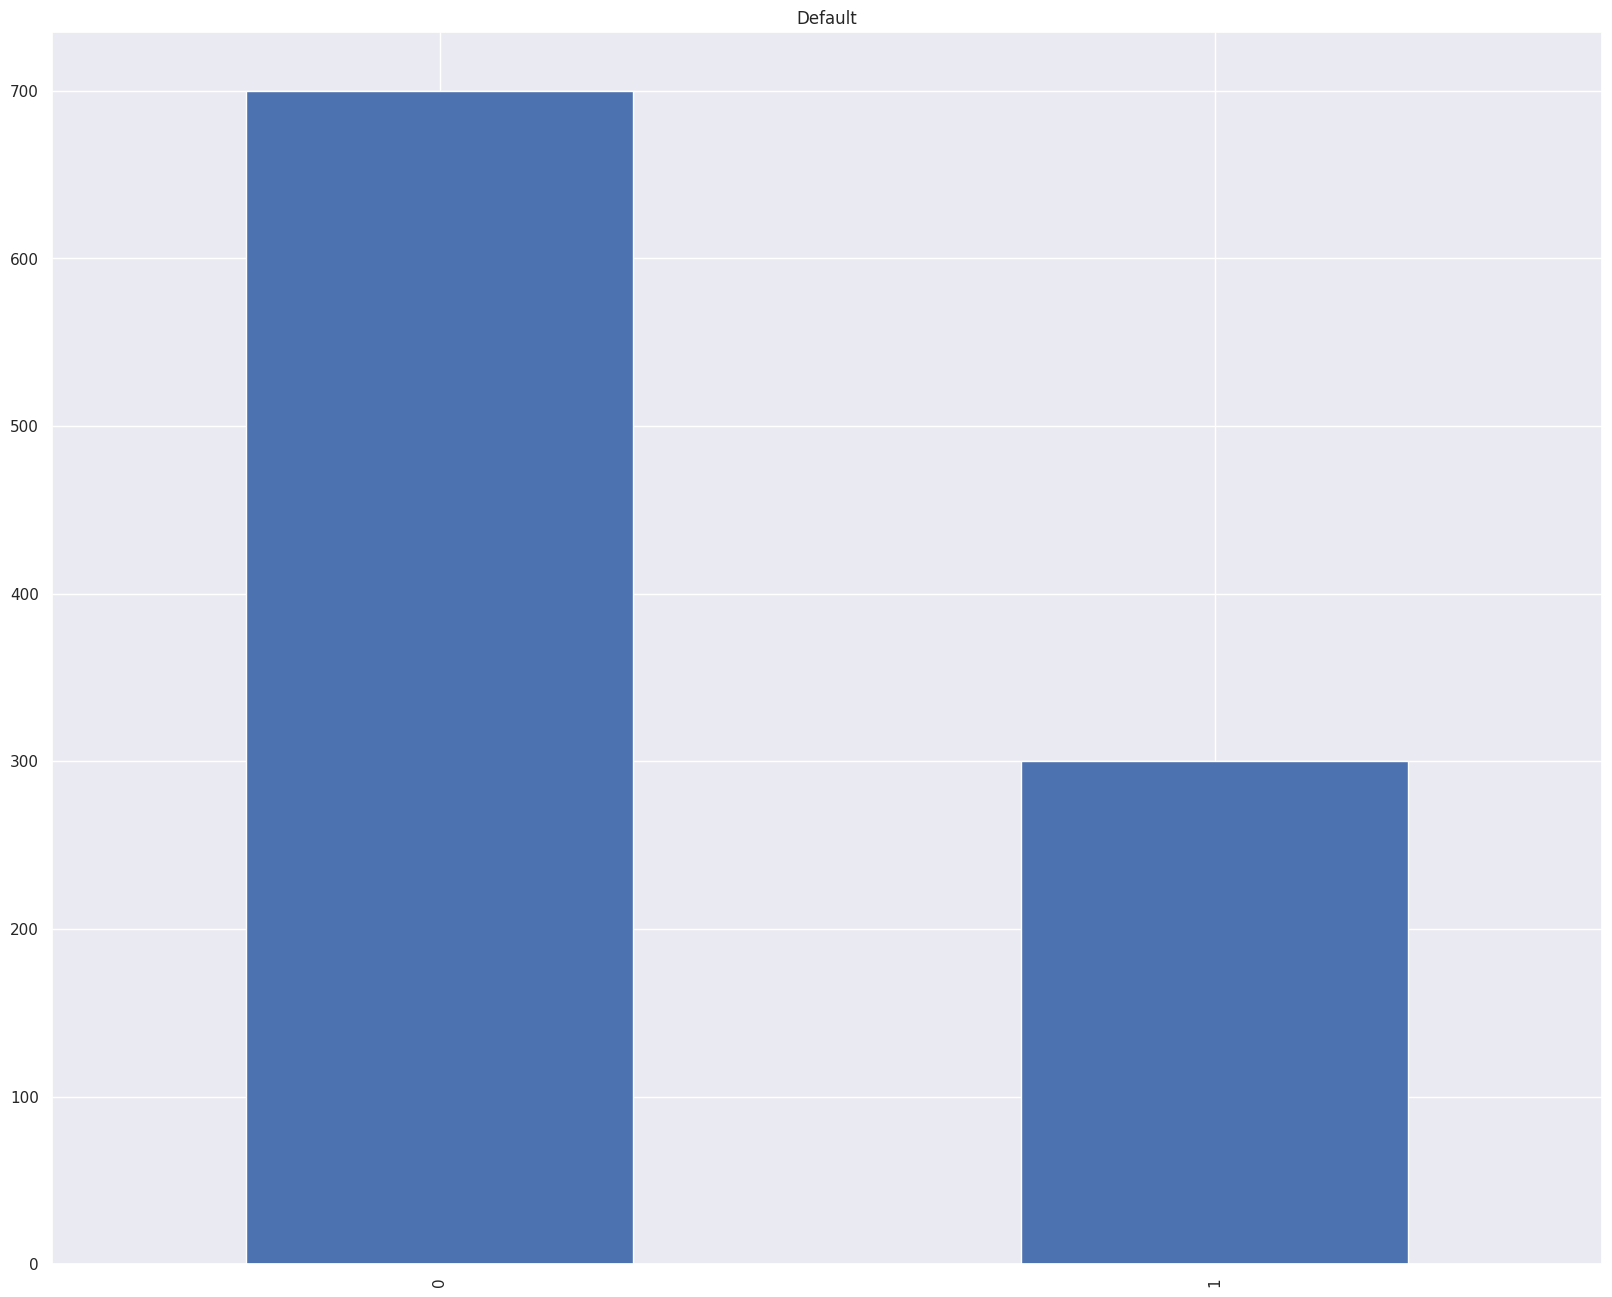

In [ ]:
analisis_exploratorio()

<Axes: >

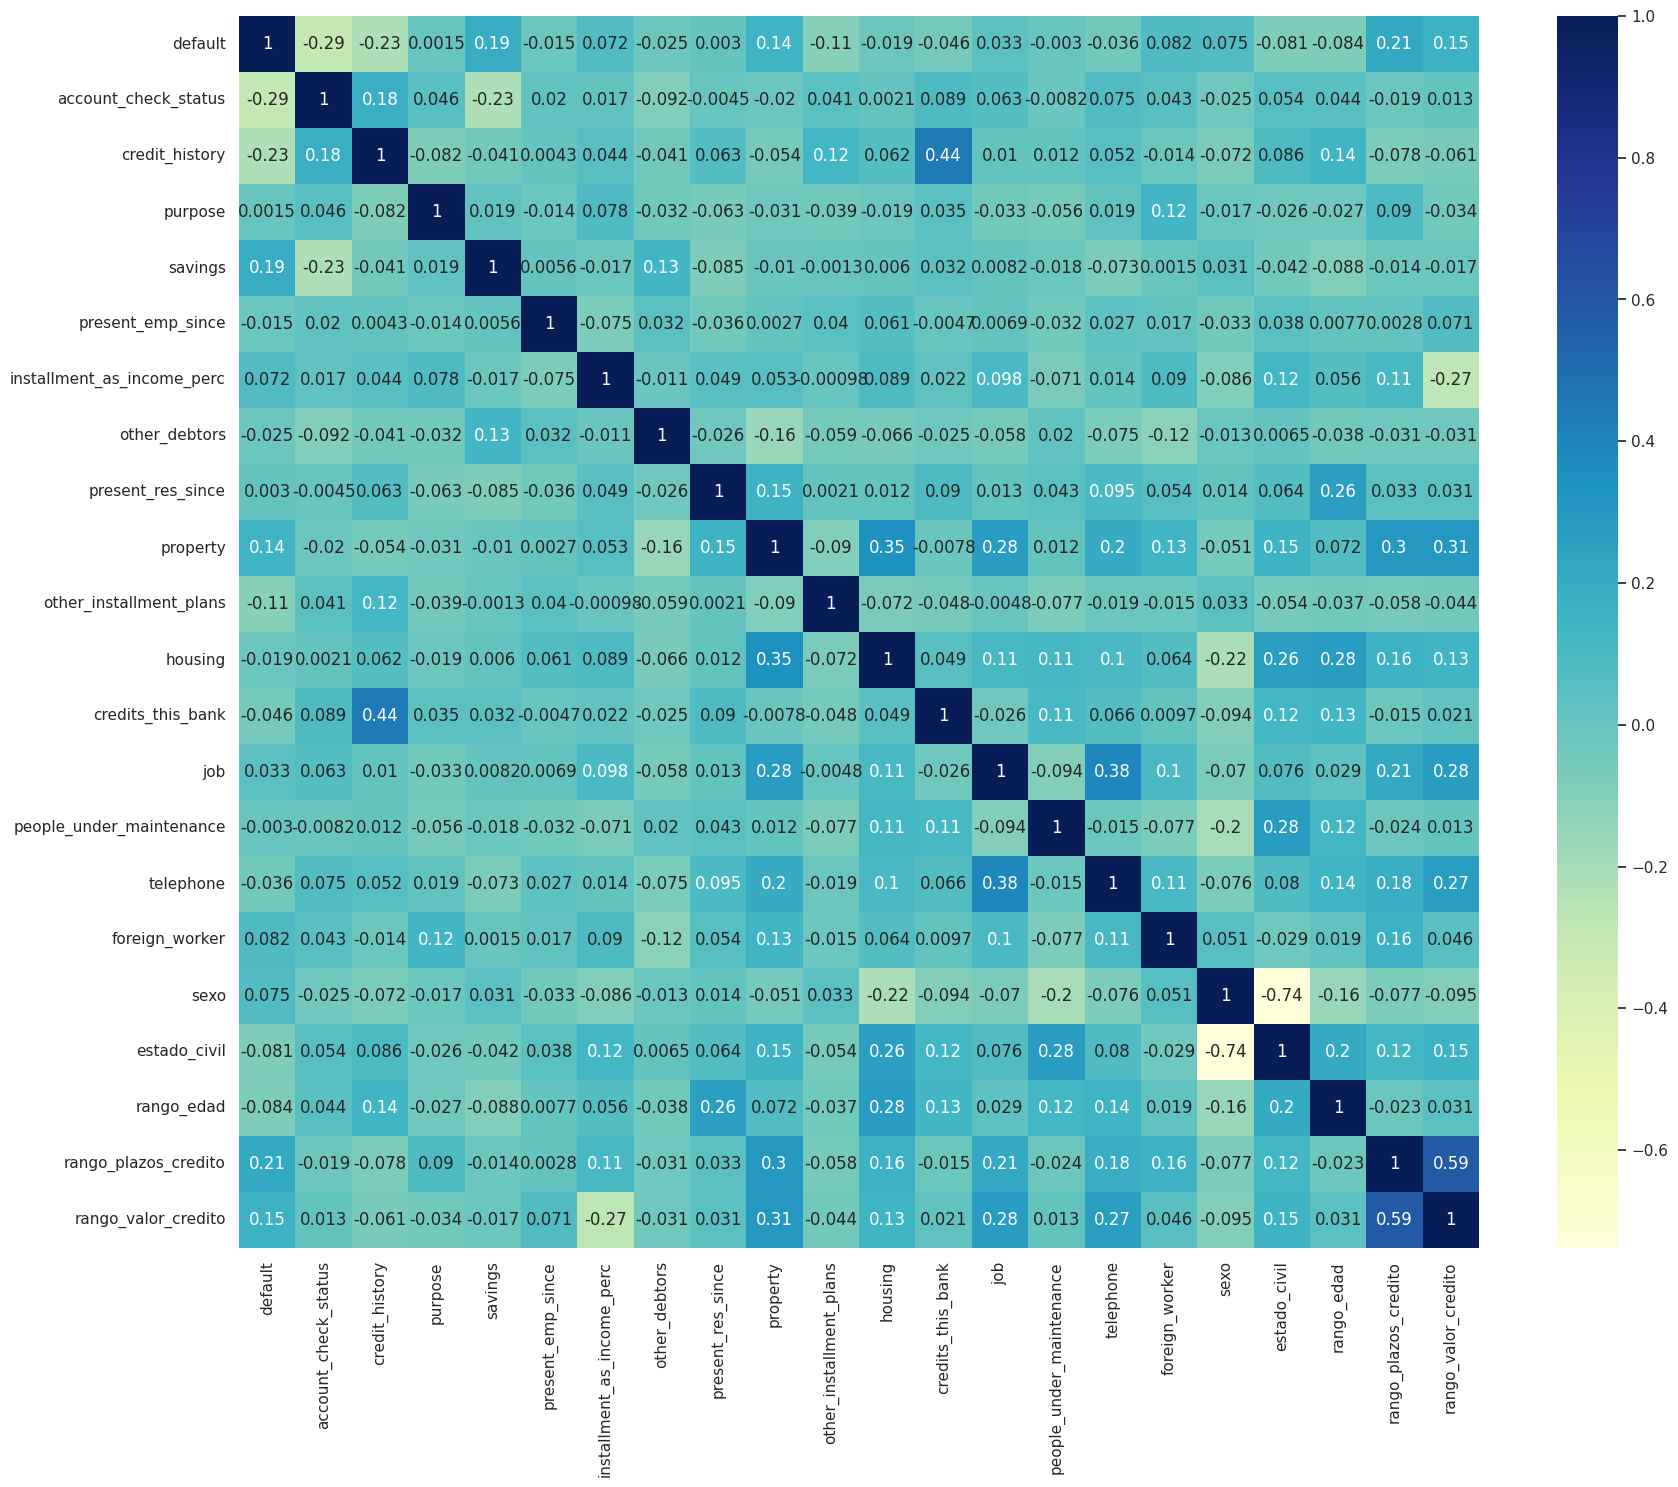

In [ ]:
sns.set(rc={'figure.figsize': (20,16)})
sns.heatmap(df_banco.corr(), annot=True, cmap="YlGnBu")

In [ ]:
def crea_modelos():

    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

    ##entrenamiento de modelos
    #1.regresión lineal
    model1 = LogisticRegression()
    model1.fit(train_x, train_y)
    predictions1 = model1.predict(test_x)
    #métricas regresion lineal
    accuracy1 = accuracy_score(test_y, predictions1)
    precision1 = precision_score(test_y, predictions1)
    recall1 = recall_score(test_y, predictions1)
    f1_score1 = f1_score(test_y, predictions1)
    auc_roc1 = roc_auc_score(test_y, predictions1)


    #2.arboles de decisión
    model2 = DecisionTreeClassifier()
    model2.fit(train_x, train_y)
    predictions2 = model2.predict(test_x)
    #métricas arboles de decisión
    accuracy2 = accuracy_score(test_y, predictions2)
    precision2 = precision_score(test_y, predictions2)
    recall2 = recall_score(test_y, predictions2)
    f1_score2 = f1_score(test_y, predictions2)
    auc_roc2 = roc_auc_score(test_y, predictions2)


    #3.Random Forest
    model3 = RandomForestClassifier()
    model3.fit(train_x, train_y)
    predictions3 = model3.predict(test_x)
    #métricas RandonForest
    accuracy3 = accuracy_score(test_y, predictions3)
    precision3 = precision_score(test_y, predictions3)
    recall3 = recall_score(test_y, predictions3)
    f1_score3 = f1_score(test_y, predictions3)
    auc_roc3 = roc_auc_score(test_y, predictions3)


    #4.Naive Bayes
    model4 = GaussianNB()
    model4.fit(train_x, train_y)
    predictions4 = model4.predict(test_x)
    #métricas Naive Bayes
    accuracy4 = accuracy_score(test_y, predictions4)
    precision4 = precision_score(test_y, predictions4)
    recall4 = recall_score(test_y, predictions4)
    f1_score4 = f1_score(test_y, predictions4)
    auc_roc4 = roc_auc_score(test_y, predictions4)


    nombre_modelo = []
    nombre_modelo.append("regresión lineal")
    nombre_modelo.append("arbol de decisión")
    nombre_modelo.append("Random Forest")
    nombre_modelo.append("Naive Bayes")

    accuracy = []
    accuracy.append(accuracy1)
    accuracy.append(accuracy2)
    accuracy.append(accuracy3)
    accuracy.append(accuracy4)

    precisionp = []
    precisionp.append(precision1)
    precisionp.append(precision2)
    precisionp.append(precision3)
    precisionp.append(precision4)

    recallp = []
    recallp.append(recall1)
    recallp.append(recall2)
    recallp.append(recall3)
    recallp.append(recall4)

    f1_scorep = []
    f1_scorep.append(f1_score1)
    f1_scorep.append(f1_score2)
    f1_scorep.append(f1_score3)
    f1_scorep.append(f1_score4)

    auc_rocp = []
    auc_rocp.append(auc_roc1)
    auc_rocp.append(auc_roc2)
    auc_rocp.append(auc_roc3)
    auc_rocp.append(auc_roc4)


    resultados = {
    'Nombre_Modelo': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precisionp,
    'Recall': recallp,
    'F1_Score': f1_scorep,
    'AUC_ROC': auc_rocp
}


    print("Regresion lineal")
    print("accuracy ",accuracy1)
    print("precision ",precision1)
    print("recall ",recall1)
    print("f1_score ",f1_score1)
    print("auc_roc ",auc_roc1)
    print(" ")

    print("Arboles de decisión")
    print("accuracy ",accuracy2)
    print("precision ",precision2)
    print("recall ",recall2)
    print("f1_score ",f1_score2)
    print("auc_roc ",auc_roc2)
    print(" ")

    print("Random Forest")
    print("accuracy ",accuracy3)
    print("precision ",precision3)
    print("recall ",recall3)
    print("f1_score ",f1_score3)
    print("auc_roc ",auc_roc3)
    print(" ")

    print("Naive Bayes")
    print("accuracy ",accuracy4)
    print("precision ",precision4)
    print("recall ",recall4)
    print("f1_score ",f1_score4)
    print("auc_roc ",auc_roc4)



In [ ]:
crea_modelos()



Regresion lineal
accuracy  0.7766666666666666
precision  0.6610169491525424
recall  0.45348837209302323
f1_score  0.5379310344827586
auc_roc  0.6800152140838948
 
Arboles de decisión
accuracy  0.7066666666666667
precision  0.4875
recall  0.45348837209302323
f1_score  0.46987951807228917
auc_roc  0.6309497935231472
 
Random Forest
accuracy  0.78
precision  0.717391304347826
recall  0.38372093023255816
f1_score  0.5000000000000001
auc_roc  0.6614866333405782
 
Naive Bayes
accuracy  0.74
precision  0.5444444444444444
recall  0.5697674418604651
f1_score  0.5568181818181818
auc_roc  0.6890893284068681


In [ ]:
def visualiza_resultados():
  global df_banco, resultados

  results_df = pd.DataFrame(resultados)
  results_df.set_index('Nombre_Modelo', inplace=True)
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

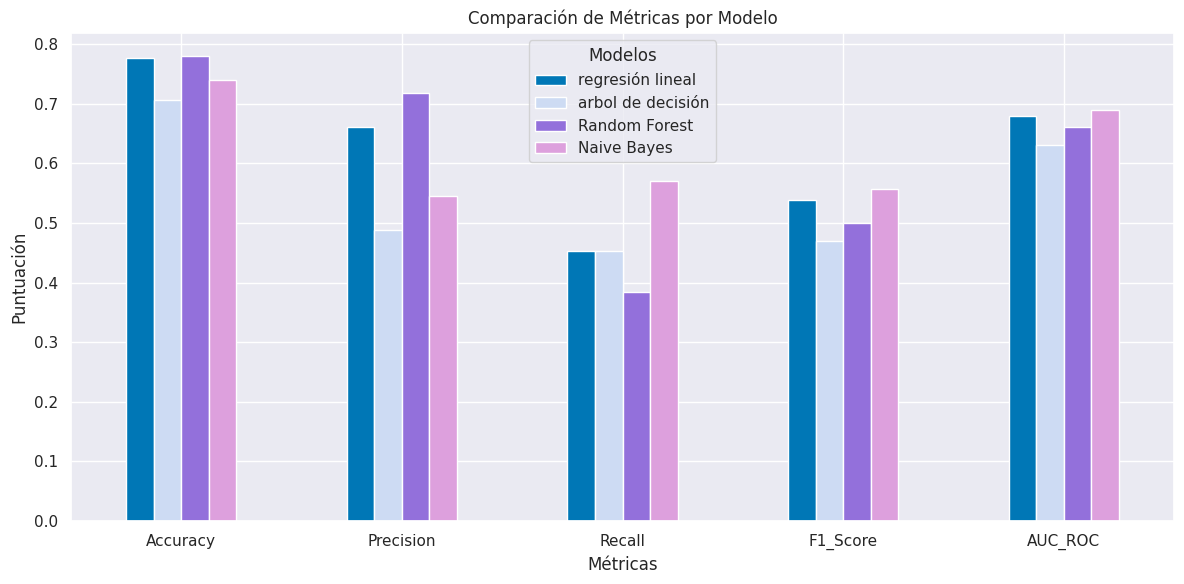

In [ ]:
visualiza_resultados()